In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = open('adult.data', 'r')
def chr_int(a):
    if a.isdigit(): return int(a)
    else: return 0

data = []
for line in file:
    data1 = line.split(', ')
    if len(data1) == 15:
        data.append([
            chr_int(data1[0]), data1[1],
            chr_int(data1[2]), data1[3],
            chr_int(data1[4]), data1[5],
            data1[6], data1[7], data1[8],
            data1[9], chr_int(data1[10]),
            chr_int(data1[11]),
            chr_int(data1[12]),
            data1[13], data1[14].strip()
        ])

# Worksheet 2
What does the  'r' do in the first line?
R indicates to open the file and read the file, turning it into a string, rather than writing into the file. These quotes ' ' indicate that it is a string
Describe the function chr_int in the second line
The isdigit() method returns True if all the characters are digits, otherwise False
Try compiling this with the "data1 - line.split(',') without that space, what happens?
data = [] means initializing an empty array, taking away the space will look for a place in the data without the space. If there is no place in the data with that identical lack of a space, then there will be nothing to output. With the space is the same condition 

Worksheet 3
What might be the best data structure to place this data in?
Data Frame 

In [3]:
#turn data (which is currently in an array) into a dataframe 
adult = pd.DataFrame(
    data,
    columns = [
        'age', 'type-employer', 'fnlwgt',
        'education', 'education_num', 'marital',
        'occupation', 'relationship', 'race', 
        'sex', 'capital_gain', 'capitol_loss',
        'hr_per_week', 'country', 'income'
        
    ]
)
adult.head()

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capitol_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Worksheet 4
Notice in the last cell we listed a bunch of column names, but the original data file didnt have any colomn names. How does Python know how to associate a column name to its column?
Python knows when to associate column names to its matching column because we set the column names during 
columns = [
        'age', 'type-employer', 'fnlwgt',
        'education', 'education_num', 'marital',
        'occupation', 'relationship', 'race', 
        'sex', 'capital_gain', 'capitol_loss',
        'hr_per_week', 'country', 'income'
        
     Python finds these case sensitive words and now knows that when any of these are individually mentioned, to associate them to its own column. 

# Worksheet 5
Print the first few lines of the adult dataframe. Go to the pandas documentation website and read about the 'columns' parameter. 
Columns parameter is an index and assigns columns in an array-like fashion. These column lables are used for a resulting dataframe. 

# Recall the guiding research question
"Are men more likely than women to become high income earners?" where high income earners are those who earn more than $50k/year.

This question is just asking if the proportion of men who earn above 50k higher, equal, or less than the proportion of all women who earn above 50k. This is different than asking if male ER doctors earn more than female ER doctors, e.g.

# We'll use this research question to inspire the creating of several sub-dataframes to make our analysis a bit easier.
Here are some examples
all men
all women
high income men
high income women
low income men 
low income women 

In [4]:
#filtering columns
men = adult[adult['sex'] == 'Male']
women = adult[adult['sex'] == 'Female']
men_high_income = adult[(adult['sex']== 'Male') & (adult['income'] == '>50K')]
women_high_income = adult[(adult['sex']== 'Female') & (adult['income'] == '>50K')]
men_low_income = adult[(adult['sex']== 'Male') & (adult['income'] == '<=50K')]
women_low_income = adult[(adult['sex']== 'Female') & (adult['income'] == '<=50K')]

In [5]:
men

,age,type-employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capitol_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K


Working on this next Tuesday  

# Module 2 Topic 3 -- EDA Basics
One of the tasks of EDA is to find out how much and what what kind of data you have. One way of finding "how much" is the following 

In [6]:
adult.shape

(32561, 15)

Notice there are 15 columns. These are alternatively called 
* column
* variable
* feature
* covariate 

# Worksheet 2
Find the size of some of those dataframes: men, women, men_high_income etc

In [7]:
men.shape

(21790, 15)

Some questions to think about when performing an EDA
* What are the features/variables/columns in this dataset?
* Are they numerical or categorical?
* Does the data seem to be sensible? Is it relevant?
* Does the data seem to be in the right scale? 0.000031 meters should be 31 micrometers 
* Does it seem like theres alot of missing data?
* Do you know what all the variables are? e.g what is "education_number" or "inlwgt"

# Module 2 Topic 4 -- Removing Outliers 

Three ways to remove outliers:
1) domain expertise.. no statisitcs needed. 
2) mean/standard deviation method 
3) median/fnterquartile range method 

The idea for 2,3 is that we want to remove outliers that are too far from the center of our dataset.
Three questions we need answers for to do this 
1) What is the center of the data?
2) How do we measure distance in a dataset?
3) How far is too far?

# The mean/standard deviation method

In [9]:
adult['age'].mean()

38.58164675532078

# Worksheet 1
find the mean age of men, women, women_high_income, men_high_income 

In [10]:
men['age'].mean()

39.43354749885268

In [11]:
men_high_income['age'].mean()

44.62578805163614

In [12]:
women['age'].mean()

36.85823043357163

In [13]:
women_high_income['age'].mean()

42.125530110262936

In [14]:
# the variance of the age of adults 
adult['age'].var()

186.06140024879625

In [16]:
# the standard deviation of the age 
adult['age'].std()

13.640432553581146

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C35B898>,
      dtype=object)

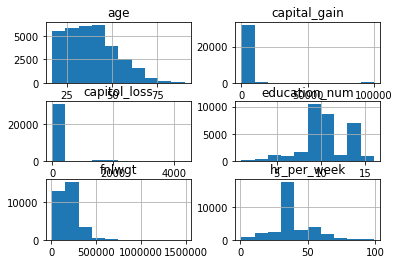

In [17]:
adult.hist()